In [477]:
using Random
using Plots
using UnicodePlots
using Statistics
function Poisson(lambda)
    r = rand(Float64)
    p = exp(-lambda)
    count = 0
    sum=p
    while true
        if r<sum
            return count
        else
            count+=1
            p = p*lambda/count
            sum+=p
        end
    end
end

Poisson (generic function with 1 method)

In [478]:
Poisson(10)

13

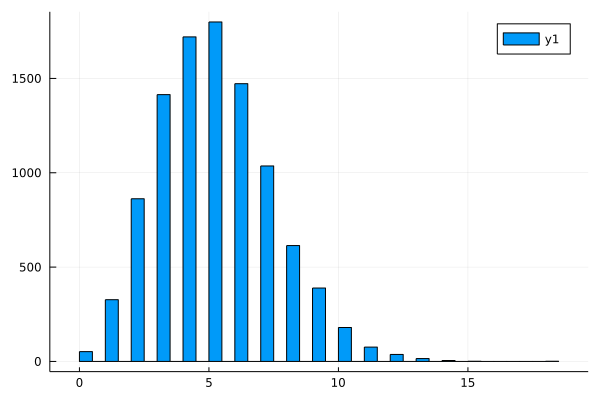

        ┌────────────────────────────────────────┐ 
   2000 │                                        │ 
        │          █                             │ 
        │        █                               │ 
        │            █                           │ 
        │      █                                 │ 
        │                                        │ 
        │                                        │ 
        │              █                         │ 
        │    █                                   │ 
        │                                        │ 
        │                █                       │ 
        │                                        │ 
        │  █               █                     │ 
        │                    █                   │ 
      0 │█                     █ █ █ █ █     █   │ 
        └────────────────────────────────────────┘ 
         0                                     20  

5.0043
4.971978707870774


In [479]:
samples = Vector()
sample_dict = Dict()
for i in 1:10000
    x = Poisson(5)
    push!(samples,x)
    if x in keys(sample_dict)
        sample_dict[x]+=1
    else
        sample_dict[x]=1
    end
end
display(histogram(samples))
# densityplot(samples)
display(densityplot(Vector([i for i in keys(sample_dict)]),Vector([i for i in values(sample_dict)])))
# display(FirstDensityPlot)
println(mean(samples))
println(var(samples))

In [480]:
#Ques 2
Binom(n,X,p) = binomial(n,Int64(X))*(p^Int64(X))*((1-p)^(n-Int64(X)))
function Poiss(X,lambda)
    p = exp(-lambda)
    for i in 1:X
        p = p*lambda/i
    end
    return p
end
    
    
function Binomial(n,p)
    lambda = n/2
#     M = n - floor(lambda*(1-p)/p)
#     c = Binom(n,M,p)/Poiss(M,lambda)
    c = 0
    V = Vector()
    for i in 0:n
        push!(V,Binom(n,i,p)/Poiss(i,lambda))
        c = max(c,Binom(n,i,p)/Poiss(i,lambda))
    end
#     println(V)
#     println(c)
#     c = 1
    X = Poisson(lambda)
    while X>n
        X = Poisson(lambda)
    end
    Px = Binom(n,X,p)
    Qx = Poiss(X,lambda)
    while true
        r = rand(Float64)
#         if (Px/Qx)*(1/c) > 1
#             print("Wrong")
#         end
        if r<(Px/Qx)*(1/c)
            return X
        end
    end
    return Px
end

Binomial (generic function with 1 method)

stdin> 16
stdin> 0.5


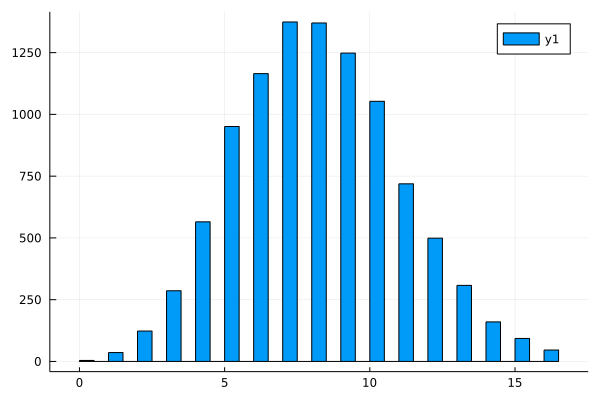

        ┌────────────────────────────────────────┐ 
   2000 │                                        │ 
        │                                        │ 
        │                                        │ 
        │                                        │ 
        │              █ █                       │ 
        │                  █                     │ 
        │            █                           │ 
        │          █         █                   │ 
        │                                        │ 
        │                      █                 │ 
        │        █                               │ 
        │                        █               │ 
        │      █                   █             │ 
        │                            █           │ 
      0 │█ █ █                         █ █       │ 
        └────────────────────────────────────────┘ 
         0                                     20  

7.9757
7.810890599059904


In [489]:
samples = Vector()
sample_dict = Dict()
n = parse(Int64,readline())
p = parse(Float64,readline())
for i in 1:10000
    x = Binomial(n,p)
    push!(samples,x)
    if x in keys(sample_dict)
        sample_dict[x]+=1
    else
        sample_dict[x]=1
    end
end
display(histogram(samples))
# densityplot(samples)
display(densityplot(Vector([i for i in keys(sample_dict)]),Vector([i for i in values(sample_dict)])))
# display(FirstDensityPlot)
println(mean(samples))
println(var(samples))